In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
models = ['bcc-csm1-1','CanESM2','CCSM4','CNRM-CM5','CSIRO-Mk3-6-0','GFDL-CM3','GISS-E2-R','HadGEM2-ES','inmcm4','IPSL-CM5A-LR','MIROC-ESM','MIROC5','MRI-CGCM3','NorESM1-M']

In [3]:
#Point at the Dutch coast
lon = 4.5
lat = 52.5

In [11]:
def getfields(scen):
    with xr.open_dataset(f'../data/others/gdyn_{scen}.nc') as ds:
        ds = ds.sel(lat=lat,lon=lon)
        gdyn = ds['SLR_lt'].values
        time = ds['time_lt'].values
    with xr.open_dataset(f'../data/others/grw.nc') as ds:
        ds = ds.sel(lat=lat,lon=lon)
        grw = ds['SLR_lt'].values
    return time,gdyn,grw

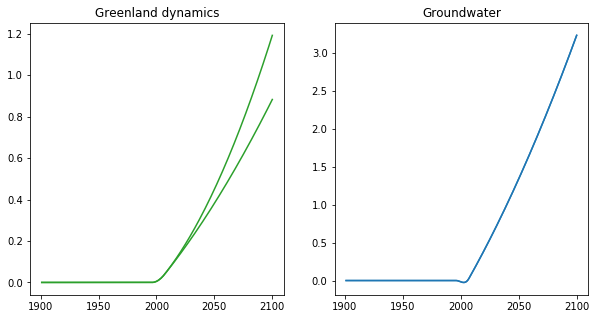

In [15]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

for scen in ['rcp45','rcp85']:
    time,gdyn,grw = getfields(model,scen)
    ax[0].plot(time,gdyn,c='tab:green')
    ax[1].plot(time,grw,c='tab:blue')
ax[0].set_title('Greenland dynamics')
ax[1].set_title('Groundwater')

plt.savefig(f'showhist.png')
plt.show()    